In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import statsmodels as sm
import statistics

import warnings
warnings.filterwarnings("ignore")

### 1. Question 1

In [2]:
int_list = np.random.randint(90, 130, size= 100)

In [3]:
int_list

array([104, 118, 115, 128, 108,  98, 128, 115, 125, 121, 106, 106, 126,
       110, 126, 104,  92, 121, 111, 119, 126, 123,  91, 119, 123, 107,
       112, 109, 104, 129, 112, 122, 114, 111, 126, 107,  92,  92, 105,
        91,  94, 104, 122,  94, 125, 115, 124,  95, 127, 100,  93, 106,
       127, 109, 100,  99, 110, 127, 119,  98, 105, 113, 124, 106, 123,
       103, 112, 111, 128, 120, 106, 115, 112, 100, 127, 121,  91, 107,
        97, 117, 104, 125, 106, 119, 120, 112, 115, 124, 121,  97, 117,
       101, 121, 113, 122, 121, 111, 117, 102, 128])

In [4]:
## Direct built in function for mean and median
mean = np.mean(int_list)
median = np.median(int_list)

print("Mean is ", mean)
print("Median is ", median)

Mean is  112.18
Median is  112.0


In [5]:
## User defined function
def calculate_mean(list):
    sum = 0
    for i in range(len(list)):
        sum = sum + list[i]
    mean = sum / len(list)
    
    return mean

def calculate_median(numbers):
    sorted_numbers = sorted(numbers)
    n = len(sorted_numbers)
    middle = n // 2

    if n % 2 == 0:
        median = (sorted_numbers[middle - 1] + sorted_numbers[middle]) / 2
    else:
        median = sorted_numbers[middle]
    return median


def calculate_mode(numbers):
    frequency = {}
    max_count = 0
    mode = None

    for number in numbers:
        if number in frequency:
            frequency[number] += 1
        else:
            frequency[number] = 1

        if frequency[number] > max_count:
            max_count = frequency[number]
            mode = number
    return mode

def calculate_statistics(numbers):
    mean = calculate_mean(numbers)
    median = calculate_median(numbers)
    mode = calculate_mode(numbers)
    return mean, median, mode


In [6]:
calculate_statistics(int_list)

(112.18, 112.0, 106)

In [7]:
### Weighted mean
def calculate_weighted_mean(values, weights):
    if len(values) != len(weights):
        raise ValueError("Number of values and weights must be equal")

    weighted_sum = sum(value * weight for value, weight in zip(values, weights))
    total_weight = sum(weights)
    
    weighted_mean = weighted_sum / total_weight
    return weighted_mean

## considering equal weights
calculate_weighted_mean(int_list, list(np.ones(100, dtype= int)))

112.18

In [8]:
## Geometric mean
def calculate_gm(list):
    prod = 1
    n = len(list)
    for num in list:
        if num <= 0:
            raise ValueError("All numbers must be positive")
        prod *= num
    gm = prod**(1/n)
    
    return gm

calculate_gm([3,4,5,6])

4.355877174692862

In [9]:
def calculate_hm(list):
    reciprocal_sum = sum(1 / num for num in list)
    harmonic_mean = len(list) / reciprocal_sum
    return harmonic_mean

calculate_hm(int_list)

111.0794180813545

In [10]:
def calculate_midrange(numbers):
    min_num = min(numbers)
    max_num = max(numbers)
    midrange = (min_num + max_num) / 2
    return midrange

calculate_midrange(int_list)

110.0

In [11]:
def find_outliers(list):
    Q1 = np.quantile(list, 0.25)
    Q3 = np.quantile(list, 0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    outliers = [num for num in list if num < lower_bound or num > upper_bound]
    return outliers

find_outliers(int_list)
## zero outliers in int_list

def trimmed_mean(list):
    outliers = find_outliers(list)
    num_without_outliers = [num for num in list if num not in outliers]
    
    if not num_without_outliers:
        return None
    mean_without_outliers = calculate_mean(num_without_outliers)
    
    return mean_without_outliers
    

In [12]:
trimmed_mean(int_list)  ## no outlier present

112.18

In [13]:
numbers = [10, 12, 14, 15, 18, 20, 22, 24, 30, 100]
outliers = find_outliers(numbers)
print("Mean with outliers is ", calculate_mean(numbers))
print("Mean without outliers is ", trimmed_mean(numbers))

Mean with outliers is  26.5
Mean without outliers is  18.333333333333332


### Question 2

In [14]:
int_list2 = np.random.randint(200, 300, size= 500)

<AxesSubplot: ylabel='Count'>

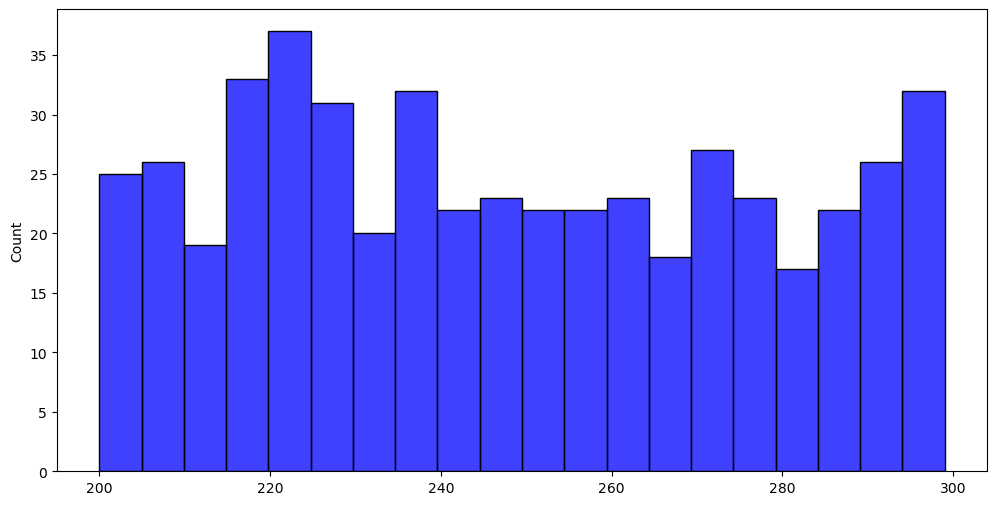

In [15]:
plt.figure(figsize=(12,6))
display(sns.histplot(int_list2, bins = 20, color= 'blue', label= 'frequency'))

<AxesSubplot: ylabel='Density'>

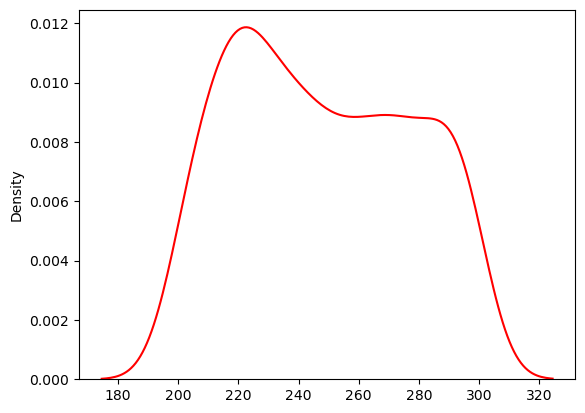

In [16]:
display(sns.kdeplot(int_list2, color= 'red', label= 'gaussian distribution'))

Text(0.5, 1.0, 'Frequency Smoothened kde plot')

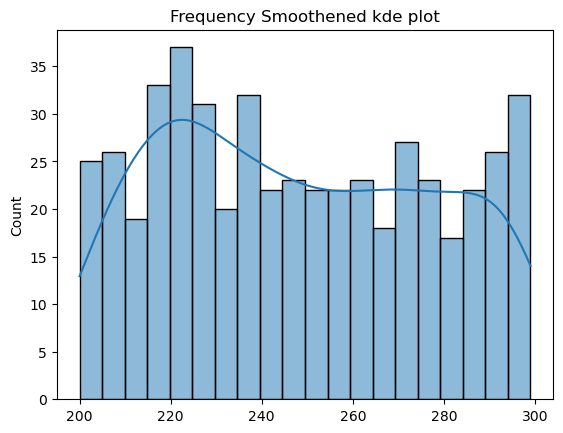

In [17]:
sns.histplot(int_list2, kde= True, bins= 20, label= 'frequency with kde')
plt.title("Frequency Smoothened kde plot")

In [18]:
def calculate_range(list):
    return max(list) - min(list)

calculate_range(int_list2)

99

In [19]:
def calculate_variance(list):
    mean  = sum(list) / len(list)
    variance = sum((x-mean)**2 for x in list) / len(list)
    return variance

def calculate_std(list):
    return calculate_variance(list) ** 0.5

print("Variance of list", calculate_variance(int_list2))
print("Standard deviation is ", calculate_std(int_list2))

Variance of list 863.4971000000002
Standard deviation is  29.38532116550711


In [20]:
def calculate_iqr(numbers):
    sorted_numbers = sorted(numbers)
    q1 = np.percentile(sorted_numbers, 25)
    q3 = np.percentile(sorted_numbers, 75)
    return q3 - q1
calculate_iqr(int_list2)

52.0

In [21]:
def calculate_coefficient_of_variation(numbers):
    mean = sum(numbers) / len(numbers)
    std_dev = calculate_std(numbers)
    return (std_dev / mean) * 100

calculate_coefficient_of_variation(int_list2)

11.847486661092251

In [22]:
def calculate_mad(numbers):
    mean = sum(numbers) / len(numbers)
    mad = sum(abs(x - mean) for x in numbers) / len(numbers)
    return mad

calculate_mad(int_list2)

25.627800000000004

In [23]:
def calculate_quartile_deviation(numbers):
    sorted_numbers = sorted(numbers)
    q1 = np.percentile(sorted_numbers, 25)
    q3 = np.percentile(sorted_numbers, 75)
    return (q3 - q1) / 2

calculate_quartile_deviation(int_list2)

26.0

In [24]:
def calculate_range_based_coefficient_of_dispersion(numbers):
    range_value = calculate_range(numbers)
    mean = sum(numbers) / len(numbers)
    return (range_value / mean) * 100

calculate_range_based_coefficient_of_dispersion(int_list2)

39.91452646857235

### Question 3

In [25]:
class DiscreteRandomVariable:
    def __init__(self, values, probabilities):
        if len(values) != len(probabilities):
            raise ValueError("Value and probability must have same length")
        if not all(0 <= p <= 1 for p in probabilities):
            raise ValueError("Probabilities must in between 0 an 1")
        if sum(probabilities) != 1:
            raise ValueError("Probabilities must sum to 1")
        
        self.values = values
        self.probabilities = probabilities
        
    def expected_value(self):
        return sum(value * prob for value, prob in zip(self.values, self.probabilities))
    
    def variance(self):
        mean = self.expected_value()
        return sum(prob * (value - mean) ** 2 for value, prob in zip(self.values, self.probabilities))

In [26]:
obj = DiscreteRandomVariable([1,2,3,4,5,6], [0.5, 0.1, 0.1, 0.05, 0.05, 0.2])
obj.expected_value()

2.6500000000000004

In [27]:
obj.variance()

4.0275

### Question 4

In [28]:
## Simuulating fair dice

def simulate_dice_rolls(n):
    outcomes = [np.random.randint(1, 6) for _ in range(n)]
    return outcomes

def calculate_expected_value_and_variance(outcomes):
    n = len(outcomes)
    mean = sum(outcomes) / n
    variance = sum((x - mean) ** 2 for x in outcomes) / n
    return mean, variance

# Simulate rolling a fair six-sided die 1000 times
outcomes = simulate_dice_rolls(1000)
mean, variance = calculate_expected_value_and_variance(outcomes)
print(f"Expected Value: {mean}, Variance: {variance}")
print("")
print("Outcomes are ")
print(outcomes)

Expected Value: 2.943, Variance: 2.0457510000000028

Outcomes are 
[1, 1, 5, 2, 1, 3, 3, 2, 2, 2, 2, 2, 4, 5, 3, 5, 2, 3, 2, 3, 1, 1, 2, 5, 1, 3, 2, 4, 4, 3, 4, 1, 3, 1, 3, 1, 2, 5, 2, 5, 1, 4, 1, 5, 1, 1, 1, 4, 4, 5, 2, 3, 3, 1, 5, 1, 5, 3, 3, 4, 5, 5, 2, 3, 2, 4, 5, 2, 2, 5, 2, 1, 2, 2, 3, 1, 4, 4, 2, 3, 1, 5, 3, 3, 4, 5, 1, 4, 4, 1, 1, 1, 1, 1, 2, 1, 3, 3, 3, 2, 5, 3, 1, 1, 4, 2, 2, 3, 1, 3, 1, 3, 4, 1, 4, 2, 3, 3, 4, 5, 5, 3, 4, 4, 1, 2, 4, 3, 4, 1, 5, 2, 4, 1, 5, 3, 5, 4, 3, 5, 1, 4, 1, 5, 3, 5, 5, 4, 5, 4, 3, 2, 5, 4, 5, 2, 2, 4, 3, 2, 2, 3, 2, 4, 4, 4, 5, 3, 4, 2, 4, 1, 2, 3, 3, 1, 2, 3, 4, 1, 2, 5, 3, 4, 3, 2, 3, 2, 2, 2, 1, 2, 3, 3, 4, 1, 1, 3, 5, 2, 3, 4, 5, 2, 3, 4, 5, 4, 4, 4, 1, 1, 3, 3, 3, 5, 5, 4, 1, 5, 1, 1, 2, 3, 1, 4, 1, 5, 1, 3, 3, 1, 5, 1, 1, 2, 4, 1, 3, 2, 1, 2, 4, 5, 1, 3, 5, 3, 2, 5, 1, 5, 1, 2, 2, 1, 3, 3, 4, 2, 4, 1, 4, 2, 4, 2, 2, 3, 4, 3, 4, 1, 1, 2, 3, 3, 4, 2, 5, 2, 1, 2, 1, 5, 3, 1, 5, 4, 1, 3, 5, 1, 1, 2, 2, 2, 4, 1, 3, 2, 3, 4, 2, 2, 1, 3, 2, 2, 5, 4, 2,

### Question 5

In [29]:
def generate_samples(distribution, params, n):
    if distribution == 'binomial':
        samples = np.random.binomial(params['n'], params['p'], n)
    elif distribution == 'poisson':
        samples = np.random.poisson(params['lam'], n)
    else:
        raise ValueError("Unsupported distribution")
        
    mean = np.mean(samples)
    variance = np.var(samples)
    
    return samples, mean, variance

In [30]:
samples, mean, variance = generate_samples('binomial', {'n': 10, 'p': 0.5}, 1000)
print(f"Mean: {mean}, Variance: {variance}")

Mean: 4.94, Variance: 2.5104


### Question 6

In [31]:
import numpy as np

def generate_gaussian_samples(mean, std_dev, n):
    samples = np.random.normal(mean, std_dev, n)
    sample_mean = np.mean(samples)
    sample_variance = np.var(samples)
    sample_std_dev = np.std(samples)
    return samples, sample_mean, sample_variance, sample_std_dev

# Example usage
samples, mean, variance, std_dev = generate_gaussian_samples(0, 1, 1000)
print(f"Mean: {mean}, Variance: {variance}, Standard Deviation: {std_dev}")


Mean: 0.04676451933721562, Variance: 1.0180226360603586, Standard Deviation: 1.008971077910739


### Question 7

In [32]:
tips = sns.load_dataset("tips")

In [33]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [34]:
def calculate_skewness(column):
    return tips[column].skew()

def skewness_type(column):
    skew = calculate_skewness(column)
    if skew > 0:
        return "Positive Skewness"
    elif skew < 0:
        return "Negative Skewness"
    else:
        return "Approximately Symmetric"
    
def calculate_covariance(col1, col2):
    return tips[col1].cov(tips[col2])

def calculate_pearson_correlation(col1, col2):
    return tips[col1].corr(tips[col2])

print(f"Skewness of 'total_bill': {calculate_skewness('total_bill')}")
print(f"Skewness type of 'total_bill': {skewness_type('total_bill')}")
print(f"Covariance between 'total_bill' and 'tip': {calculate_covariance('total_bill', 'tip')}")
print(f"Pearson correlation between 'total_bill' and 'tip': {calculate_pearson_correlation('total_bill', 'tip')}")


Skewness of 'total_bill': 1.1332130376158205
Skewness type of 'total_bill': Positive Skewness
Covariance between 'total_bill' and 'tip': 8.323501629224854
Pearson correlation between 'total_bill' and 'tip': 0.6757341092113641


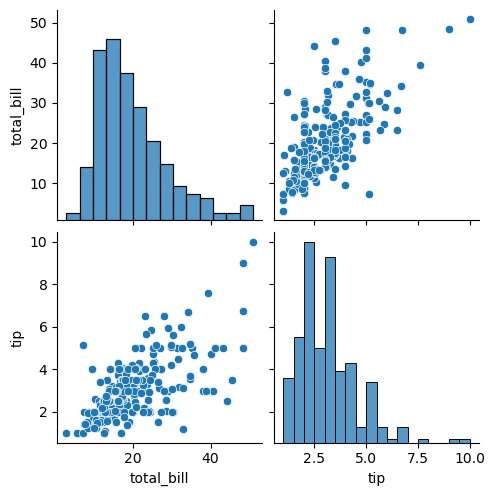

In [35]:
sns.pairplot(tips, vars=['total_bill', 'tip'])
plt.show()

### Question 8

In [36]:
from scipy.stats import norm

def normal_pdf(x, mean, std):
    return norm.pdf(x, mean, std)

x = 0
mean = 0
std_dev = 1
print(f"PDF at x={x}: {normal_pdf(x, mean, std_dev)}")

PDF at x=0: 0.3989422804014327


### Question 9

In [37]:
from scipy.stats import expon

def exponential_cdf(x, scale):
    return expon.cdf(x, scale=scale)

# Example usage
x = 1
scale = 1
print(f"CDF at x={x}: {exponential_cdf(x, scale)}")


CDF at x=1: 0.6321205588285577


### Question 10

In [38]:
from scipy.stats import poisson

def poisson_pmf(k, lam):
    return poisson.pmf(k, lam)

# Example usage
k = 3
lam = 2
print(f"PMF at k={k}: {poisson_pmf(k, lam)}")


PMF at k=3: 0.18044704431548356


### Question 11

In [39]:
# 50 purchases out of 1000 visitors
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

old_layout = np.array([1] * 50 + [0] * 950)

# 70 purchases out of 1000 visitors  

new_layout = np.array([1] * 70 + [0] * 930)

successes = np.array([old_layout.sum(), new_layout.sum()])
trials = np.array([old_layout.size, new_layout.size])

z_stats, p_value = proportions_ztest(successes, trials)

alpha = p_value ## for one tail test
z_critical = norm.ppf(1 - alpha)

print("z statistics is ", z_stats)
print("p value is ", p_value)
print("Z critical is ", z_critical)

z statistics is  -1.883108942886774
p value is  0.059685605532426224
Z critical is  1.5574182706413455


1. we use a significance level of 0.05, the p-value is just above this threshold. Thus, we do not reject the null hypothesis at the 5% significance level. This means that there is not enough statistical evidence to conclude that the new layout leads to a higher conversion rate compared to the old layout.
2. However, the p-value is quite close to 0.05, suggesting that there is a marginal indication that the new layout could be better. It might be worth investigating further with more data or considering a slightly higher significance level (e.g., 0.10) if appropriate for the business context.

### Question 12.

In [40]:
from statsmodels.stats.weightstats import ztest
before_program = np.array([75, 80, 85, 70, 90, 78, 92, 88, 82, 87])

after_program = np.array([80, 85, 90, 80, 92, 80, 95, 90, 85, 88])

### Here Null hypothesis : after_program_performance > before_program_performance
## here alternate hypothesis : after <= before
## Null hypothesis : after_program_mean = before_program_mean = 0
## Alternate hypothesis  > 0
## thus one tail test

differences = after_program - before_program
z_stat, p_value = ztest(differences, alternative= 'larger', value= 0)
print("z statistics is :", z_stat)
print("p value is ", p_value)

alpha = p_value ## for one tail test
z_critical = norm.ppf(1 - alpha)
print("z critical is ", z_critical)

## Here conclusion points as 
## No impact even after program as z_critical = z_statistics

z statistics is : 4.593190894944668
p value is  2.182597052671683e-06
z critical is  4.593190894947048


### Question 13

In [41]:
before_drug = np.array([145, 150, 140, 135, 155, 160, 152, 148, 130, 138])

after_drug = np.array([130, 140, 132, 128, 145, 148, 138, 136, 125, 130])

differences = after_drug - before_drug

z_stats, p_value = ztest(differences, alternative= 'larger', value=0)

print("z statistics is :", z_stat)
print("p value is ", p_value)

alpha = p_value ## for one tail test
z_critical = norm.ppf(1 - alpha)
print("z critical is ", z_critical)


## thus significant effect on reducing blood pressure after new drug..

z statistics is : 4.593190894944668
p value is  1.0
z critical is  -inf


### Question 14

Z-statistic: -3.184457226042963
P-value: 0.0007251287113068958
Reject the null hypothesis: The average response time is less than 5 minutes.


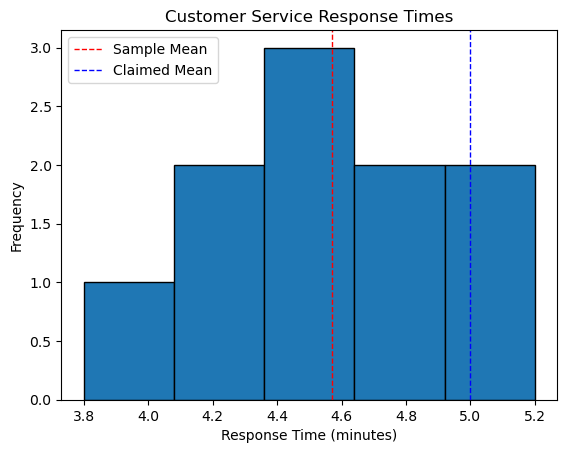

In [43]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Data
response_times = np.array([4.3, 3.8, 5.1, 4.9, 4.7, 4.2, 5.2, 4.5, 4.6, 4.4])
mu = 5  # claimed average response time
n = len(response_times)
sample_mean = np.mean(response_times)
sample_std = np.std(response_times, ddof=1)  # sample standard deviation

# Z-test
z = (sample_mean - mu) / (sample_std / np.sqrt(n))
p_value = stats.norm.cdf(z)  # one-tailed test

print("Z-statistic:", z)
print("P-value:", p_value)

# Insights
if p_value < 0.05:
    print("Reject the null hypothesis: The average response time is less than 5 minutes.")
else:
    print("Fail to reject the null hypothesis: Not enough evidence to say the average response time is less than 5 minutes.")

# Plot
plt.hist(response_times, bins=5, edgecolor='black')
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mu, color='blue', linestyle='dashed', linewidth=1)
plt.title('Customer Service Response Times')
plt.xlabel('Response Time (minutes)')
plt.ylabel('Frequency')
plt.legend({'Sample Mean': sample_mean, 'Claimed Mean': mu})
plt.show()


### Question 15

T-statistic: -7.298102156175071
P-value: 8.833437608301987e-07
Reject the null hypothesis: There is a significant difference in click-through rates between the two layouts.


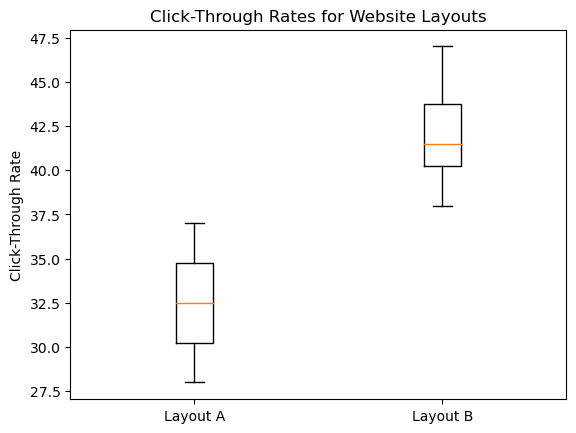

In [44]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Data
layout_a_clicks = [28, 32, 33, 29, 31, 34, 30, 35, 36, 37]
layout_b_clicks = [40, 41, 38, 42, 39, 44, 43, 41, 45, 47]

# Independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(layout_a_clicks, layout_b_clicks)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Insights
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in click-through rates between the two layouts.")
else:
    print("Fail to reject the null hypothesis: No significant difference in click-through rates between the two layouts.")

# Plot
plt.boxplot([layout_a_clicks, layout_b_clicks], labels=['Layout A', 'Layout B'])
plt.title('Click-Through Rates for Website Layouts')
plt.ylabel('Click-Through Rate')
plt.show()


### Question 16

T-statistic: 4.14048098620866
P-value: 0.0006143398442372505
Reject the null hypothesis: The new drug is more effective in reducing cholesterol levels.


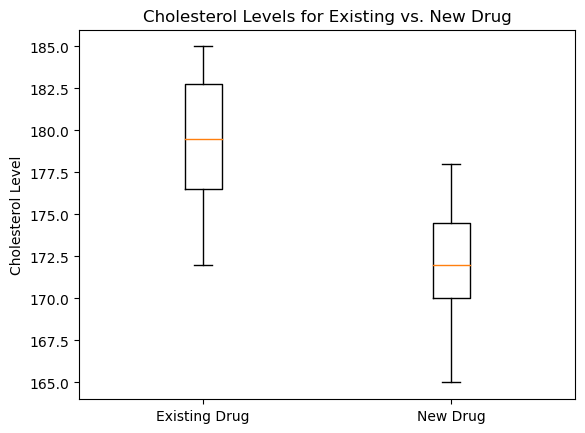

In [45]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Data
existing_drug_levels = [180, 182, 175, 185, 178, 176, 172, 184, 179, 183]
new_drug_levels = [170, 172, 165, 168, 175, 173, 170, 178, 172, 176]

# Independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(existing_drug_levels, new_drug_levels)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Insights
if p_value < 0.05:
    print("Reject the null hypothesis: The new drug is more effective in reducing cholesterol levels.")
else:
    print("Fail to reject the null hypothesis: No significant difference in effectiveness between the new and existing drugs.")

# Plot
plt.boxplot([existing_drug_levels, new_drug_levels], labels=['Existing Drug', 'New Drug'])
plt.title('Cholesterol Levels for Existing vs. New Drug')
plt.ylabel('Cholesterol Level')
plt.show()


### Question 17

T-statistic: -4.42840883965761
P-value: 0.0016509548165795493
Reject the null hypothesis: The educational intervention significantly improved math scores.


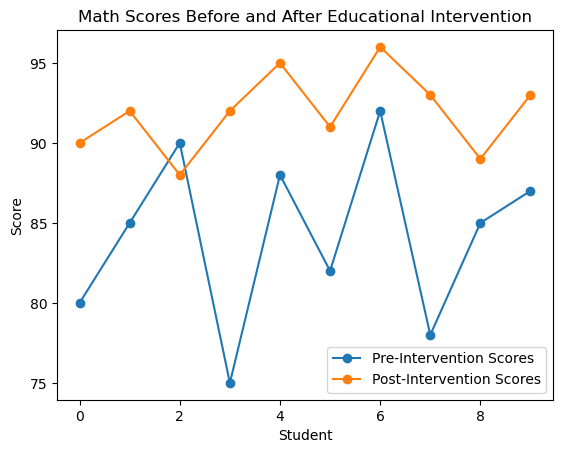

In [46]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Data
pre_intervention_scores = [80, 85, 90, 75, 88, 82, 92, 78, 85, 87]
post_intervention_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]

# Paired t-test
t_statistic, p_value = stats.ttest_rel(pre_intervention_scores, post_intervention_scores)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Insights
if p_value < 0.05:
    print("Reject the null hypothesis: The educational intervention significantly improved math scores.")
else:
    print("Fail to reject the null hypothesis: No significant improvement in math scores due to the intervention.")

# Plot
plt.plot(pre_intervention_scores, label='Pre-Intervention Scores', marker='o')
plt.plot(post_intervention_scores, label='Post-Intervention Scores', marker='o')
plt.title('Math Scores Before and After Educational Intervention')
plt.xlabel('Student')
plt.ylabel('Score')
plt.legend()
plt.show()


### Question 18

T-statistic: 0.06114208969631383
P-value: 0.9515665020676465
Fail to reject the null hypothesis: No significant difference in average salaries between male and female employees.


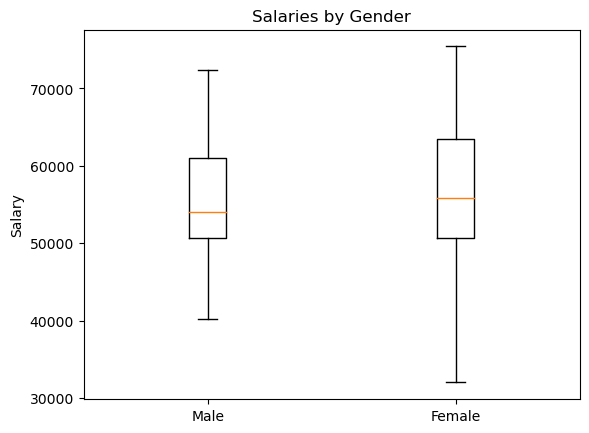

In [47]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Generate synthetic salary data
np.random.seed(0)
male_salaries = np.random.normal(loc=50000, scale=10000, size=20)
female_salaries = np.random.normal(loc=55000, scale=9000, size=20)

# Independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(male_salaries, female_salaries)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Insights
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in average salaries between male and female employees.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average salaries between male and female employees.")

# Plot
plt.boxplot([male_salaries, female_salaries], labels=['Male', 'Female'])
plt.title('Salaries by Gender')
plt.ylabel('Salary')
plt.show()


### Question 19

T-statistic: 11.325830417646698
P-value: 3.6824250702873965e-15
Reject the null hypothesis: There is a significant difference in quality scores between the two product versions.


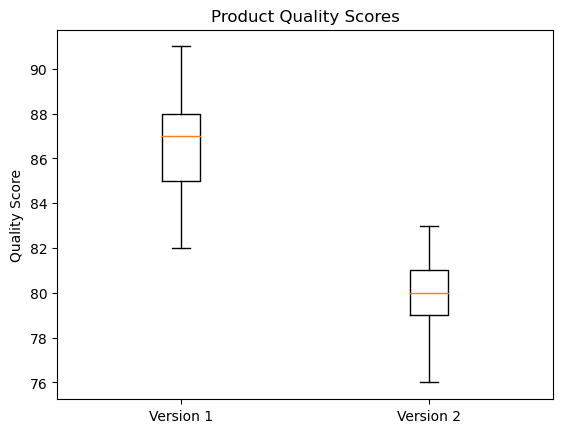

In [48]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Data
version1_scores = [85, 88, 82, 89, 87, 84, 90, 88, 85, 86, 91, 83, 87, 84, 89, 86, 84, 88, 85, 86, 89, 90, 87, 88, 85]
version2_scores = [80, 78, 83, 81, 79, 82, 76, 80, 78, 81, 77, 82, 80, 79, 82, 79, 80, 81, 79, 82, 79, 78, 80, 81, 82]

# Independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(version1_scores, version2_scores)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Insights
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in quality scores between the two product versions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in quality scores between the two product versions.")

# Plot
plt.boxplot([version1_scores, version2_scores], labels=['Version 1', 'Version 2'])
plt.title('Product Quality Scores')
plt.ylabel('Quality Score')
plt.show()


### Question 20

T-statistic: 5.480077554195743
P-value: 8.895290509945655e-07
Reject the null hypothesis: There is a significant difference in customer satisfaction between the two branches.


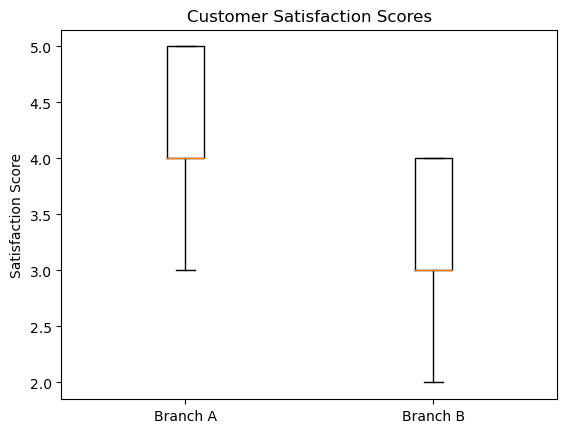

In [49]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Data
branch_a_scores = [4, 5, 3, 4, 5, 4, 5, 3, 4, 4, 5, 4, 4, 3, 4, 5, 5, 4, 3, 4, 5, 4, 3, 5, 4, 4, 5, 3, 4, 5, 4]
branch_b_scores = [3, 4, 2, 3, 4, 3, 4, 2, 3, 3, 4, 3, 3, 2, 3, 4, 4, 3, 2, 3, 4, 3, 2, 4, 3, 3, 4, 2, 3, 4, 3]

# Independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(branch_a_scores, branch_b_scores)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Insights
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in customer satisfaction between the two branches.")
else:
    print("Fail to reject the null hypothesis: No significant difference in customer satisfaction between the two branches.")

# Plot
plt.boxplot([branch_a_scores, branch_b_scores], labels=['Branch A', 'Branch B'])
plt.title('Customer Satisfaction Scores')
plt.ylabel('Satisfaction Score')
plt.show()


### Question 21

Chi-Square Statistic: 0.8779923945254768
P-value: 0.6446832311860852
Fail to reject the null hypothesis: No significant association between age groups and voter preferences.


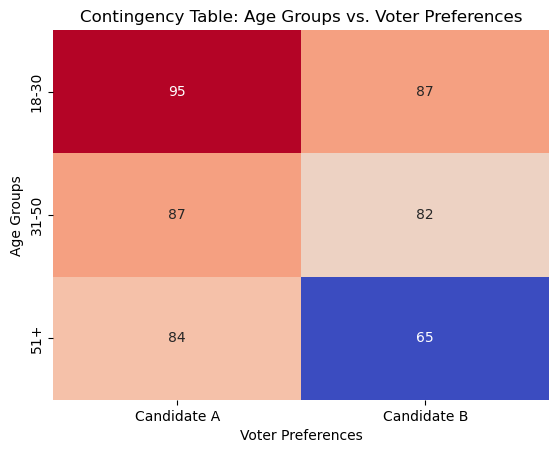

In [50]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Generate synthetic data
np.random.seed(0)
age_groups = np.random.choice(['18-30', '31-50', '51+'], size=500)
voter_preferences = np.random.choice(['Candidate A', 'Candidate B'], size=500)

# Create a contingency table
contingency_table = pd.crosstab(age_groups, voter_preferences)

# Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

# Insights
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between age groups and voter preferences.")
else:
    print("Fail to reject the null hypothesis: No significant association between age groups and voter preferences.")

# Plot
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', cbar=False)
plt.title('Contingency Table: Age Groups vs. Voter Preferences')
plt.xlabel('Voter Preferences')
plt.ylabel('Age Groups')
plt.show()


In [52]:
contingency_table

col_0,Candidate A,Candidate B
row_0,,
18-30,95,87
31-50,87,82
51+,84,65


### Question 22

 22. A company conducted a customer satisfaction survey to determine if there is a significant relationship
between product satisfaction levels (Satisfied, Neutral, Dissatisfied) and the region where customers are
located (East, West, North, South). The survey data is summarized in a contingency table. Conduct a ChiSquare test to determine if there is a significant relationship between product satisfaction levels and
customer regions.

Chi-Square Statistic: 27.777056277056275
P-value: 0.00010349448486004387
Reject the null hypothesis: There is a significant relationship between product satisfaction levels and customer regions.


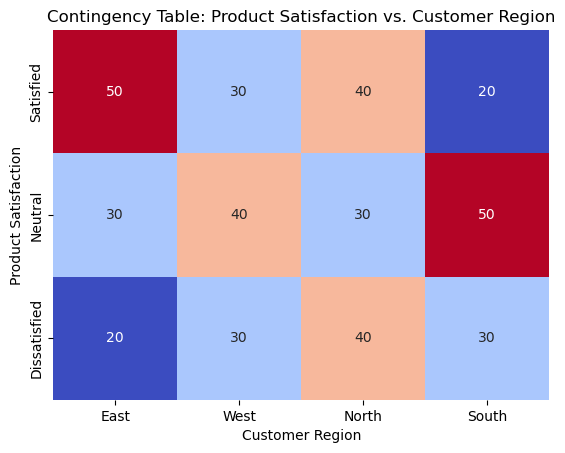

In [53]:
#Sample data: Product satisfaction levels (rows) vs. Customer regions (columns)

data = np.array([[50, 30, 40, 20], [30, 40, 30, 50], [20, 30, 40, 30]])

# Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(data)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

# Insights
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between product satisfaction levels and customer regions.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between product satisfaction levels and customer regions.")

# Plot
satisfaction_levels = ['Satisfied', 'Neutral', 'Dissatisfied']
regions = ['East', 'West', 'North', 'South']
df = pd.DataFrame(data, index=satisfaction_levels, columns=regions)

sns.heatmap(df, annot=True, cmap='coolwarm', cbar=False)
plt.title('Contingency Table: Product Satisfaction vs. Customer Region')
plt.xlabel('Customer Region')
plt.ylabel('Product Satisfaction')
plt.show()

### Question 23.

 A company implemented an employee training program to improve job performance (Effective, Neutral,
Ineffective). After the training, they collected data from a sample of employees and classified them based
on their job performance before and after the training. Perform a Chi-Square test to determine if there is a
significant difference between job performance levels before and after the training.

Chi-Square Statistic: 22.161728395061726
P-value: 0.00018609719479882557
Reject the null hypothesis: There is a significant difference in job performance levels before and after training.


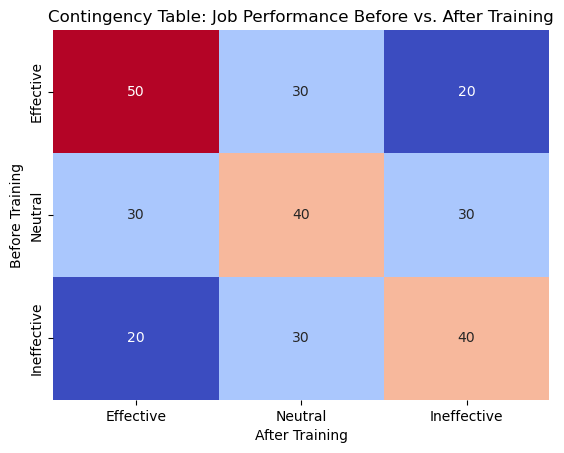

In [54]:

# Sample data: Job performance levels before (rows) and after (columns) training
data = np.array([[50, 30, 20], [30, 40, 30], [20, 30, 40]])

# Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(data)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

# Insights
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in job performance levels before and after training.")
else:
    print("Fail to reject the null hypothesis: No significant difference in job performance levels before and after training.")

# Plot
performance_levels = ['Effective', 'Neutral', 'Ineffective']
df = pd.DataFrame(data, index=performance_levels, columns=performance_levels)

sns.heatmap(df, annot=True, cmap='coolwarm', cbar=False)
plt.title('Contingency Table: Job Performance Before vs. After Training')
plt.xlabel('After Training')
plt.ylabel('Before Training')
plt.show()


### Question 24

 A company produces three different versions of a product: Standard, Premium, and Deluxe. The
company wants to determine if there is a significant difference in customer satisfaction scores among the
three product versions. They conducted a survey and collected customer satisfaction scores for each
version from a random sample of customers. Perform an ANOVA test to determine if there is a significant
difference in customer satisfaction scores.

F-statistic: 11.356353591160225
P-value: 0.0002636942911775212
Reject the null hypothesis: There is a significant difference in customer satisfaction scores among the three product versions.


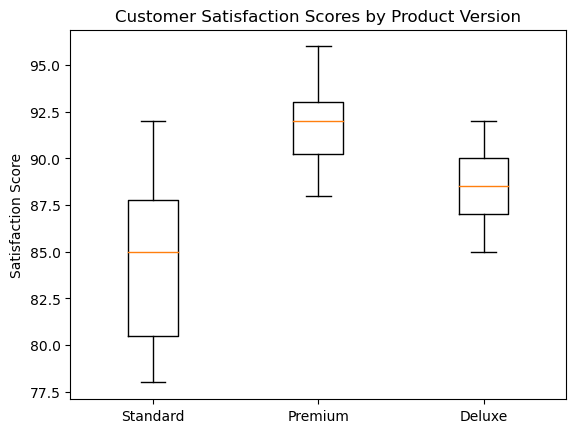

In [55]:
# Sample data: Customer satisfaction scores for each product version
standard_scores = [80, 85, 90, 78, 88, 82, 92, 78, 85, 87]
premium_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]
deluxe_scores = [85, 87, 90, 85, 89, 87, 92, 90, 88, 91]

# ANOVA test
f_statistic, p_value = stats.f_oneway(standard_scores, premium_scores, deluxe_scores)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Insights
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in customer satisfaction scores among the three product versions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in customer satisfaction scores among the three product versions.")

# Plot
data = [standard_scores, premium_scores, deluxe_scores]
labels = ['Standard', 'Premium', 'Deluxe']
plt.boxplot(data, labels=labels)
plt.title('Customer Satisfaction Scores by Product Version')
plt.ylabel('Satisfaction Score')
plt.show()
